__Data Pre_processing__

scikit learn does not accept categorical features by default, the need to be converted into numerical values.

This can be done by converting them into binary features called dummy variable.

Let explore mental health data for student to understand this.

In [118]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso

In [119]:
# Load the dataset
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

from the dataset imformation, it is clear that Gender, Mental_Health_Status, Stress_Level, Support_Systems_Access, Work_Environment_Impact and Online_Support_Usage are categorical variables. But before then, the studentID column will be dropped as it has no effect on the data 

In [121]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64

No missing values

In [122]:
# drop the User_ID column
df = df.drop('User_ID', axis=1)
df.head()

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [123]:
# Convert categorical columns to categorical data type
categorical_columns = ['Gender', 'Mental_Health_Status', 'Stress_Level', 'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage']
# convert categorical columns to categorical data type
for col in categorical_columns:
    df[col] = df[col].astype('category')

Check the data type

In [124]:
# check the dtypes
df.dtypes

Age                            int64
Gender                      category
Technology_Usage_Hours       float64
Social_Media_Usage_Hours     float64
Gaming_Hours                 float64
Screen_Time_Hours            float64
Mental_Health_Status        category
Stress_Level                category
Sleep_Hours                  float64
Physical_Activity_Hours      float64
Support_Systems_Access      category
Work_Environment_Impact     category
Online_Support_Usage        category
dtype: object

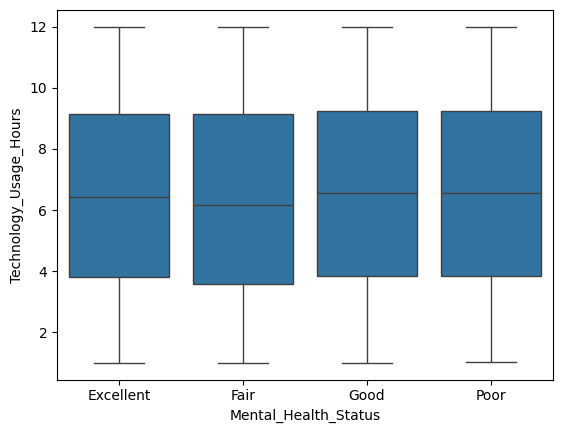

In [125]:
sns.boxplot(data=df, x='Mental_Health_Status', y='Technology_Usage_Hours')
plt.show()

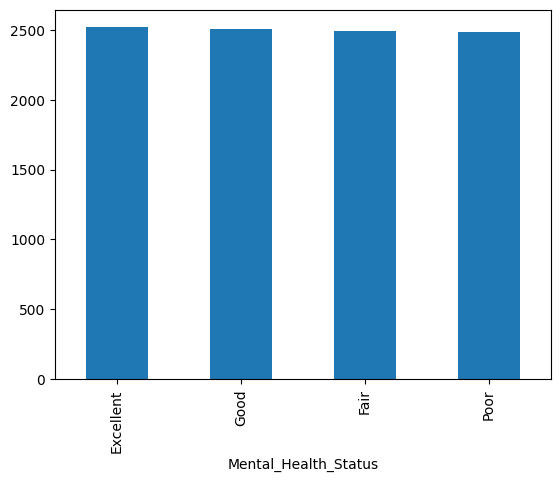

In [126]:
# Barplot
df['Mental_Health_Status'].value_counts().plot(kind='bar')  
plt.show()

In [127]:
# convert the categories to numerical values
df['Gender'] = df['Gender'].cat.codes
df['Mental_Health_Status'] = df['Mental_Health_Status'].cat.codes
df['Stress_Level'] = df['Stress_Level'].cat.codes
df['Support_Systems_Access'] = df['Support_Systems_Access'].cat.codes
df['Work_Environment_Impact'] = df['Work_Environment_Impact'].cat.codes
df['Online_Support_Usage'] = df['Online_Support_Usage'].cat.codes

df.head()

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,23,0,6.57,6.00,0.68,12.36,2,1,8.01,6.71,0,0,1
1,21,1,3.01,2.57,3.74,7.61,3,0,7.28,5.88,1,2,0
2,51,1,3.04,6.14,1.26,3.16,1,0,8.04,9.81,0,0,0
3,25,0,3.84,4.48,2.59,13.08,0,2,5.62,5.28,1,0,1
4,53,1,1.20,0.56,0.29,12.63,2,1,5.55,4.00,0,2,1


In [128]:
# split the data into train and test sets
X = df.drop('Mental_Health_Status', axis=1)
y = df['Mental_Health_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# create a linear regression model
model = LinearRegression()

# train the model using cross-validation
scores = cross_val_score(model, X, y, cv=kfold,
                         scoring='neg_mean_squared_error')

# calculate the mean squared error
rmse = np.sqrt(-scores)
print('Root Mean squared error:', rmse)

Root Mean squared error: [1.1148205  1.13059942 1.10052589 1.13083956 1.11795351]


In [130]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
ridge_scores = cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE
ridge_rmse = np.sqrt(-ridge_scores)
print(f"RMSE_ridge = {ridge_rmse}")

RMSE_ridge = [1.11482044 1.1305993  1.10052586 1.13083959 1.11795346]


In [131]:
# K-fold cross-validation
kf_lasso = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate a ridge model
lasso = Lasso(alpha=0.3)

# Perform cross-validation
lasso_scores = cross_val_score(lasso, X, y, cv=kf_lasso, scoring='neg_mean_squared_error')

# Calculate RMSE
lasso_rmse = np.sqrt(-lasso_scores)
print(f"RMSE = {lasso_rmse}")

RMSE = [1.11311615 1.12959164 1.10047121 1.13135865 1.11650731]
